In [1]:
!pip install python-louvain
!pip install networkx
!pip3 install --upgrade networkx
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ROOT = "/content/drive/MyDrive/Colab Notebooks/DM/논문참조"

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import pandas as pd
import numpy as np
import re
import koreanize_matplotlib
import matplotlib.font_manager as fm
import random
random.seed(1234)

# 2022 결과보고서 기반

In [5]:
result_df = pd.read_csv(f"{ROOT}/data/결과보고서_외부체험내역.csv")
result_df.head()

,학교명,체험처,주소,위도,경도
0,감문중학교,국립종자원,경북 김천시 혁신8로 119,36.126285,128.192914
1,감문중학교,김천요리제과 직업전문학교,경북 김천시 김천로 51,36.118102,128.123811
2,감문중학교,김천은호승마 클럽,경북 김천시 개령면 김선로 23-13,36.167626,128.201037
3,감문중학교,꽃누리,경북 포항시 북구 법원로 152,36.081710,129.385518
4,감문중학교,나다음에듀,대구 수성구 동대구로80길 14,35.866268,128.630528


## Step1. Graph

In [6]:
result_list = []
grouped_df = result_df.groupby(['학교명', '체험처']).size().reset_index(name='행 개수')

for index, row in grouped_df.iterrows():
    school = row['학교명']
    experience = row['체험처']
    row_count = row['행 개수'] / 100
    result_list.append((school, experience, row_count))

print(result_list)

[('감문중학교', '국립종자원', 0.01), ('감문중학교', '김천요리제과 직업전문학교', 0.01), ('감문중학교', '김천은호승마 클럽', 0.01), ('감문중학교', '꽃누리', 0.01), ('감문중학교', '나다음에듀', 0.01), ('감문중학교', '라라의 공방', 0.01), ('감포중학교', '경상북도발명교육체험관', 0.02), ('감포중학교', '위덕대학교', 0.02), ('감포중학교', '화랑마을', 0.02), ('강구중학교', '청하기청산식물원', 0.01), ('경구중학교', '경북청소년', 0.01), ('경구중학교', '경북환경연수원', 0.02), ('경구중학교', '금융감독원', 0.01), ('경구중학교', '어깨동무 교육지원센터', 0.11), ('경구중학교', '한국생산성본부', 0.01), ('경구중학교', '활동진흥센터', 0.01), ('경산여자중학교', '경산마태우리승마장', 0.01), ('경산여자중학교', '경산수학체험센터', 0.01), ('경산여자중학교', '남부미래교육관', 0.01), ('경산여자중학교', '삼성현 역사문화공원', 0.01), ('경산여자중학교', '청소년수련원', 0.01), ('경산제일중학교', '경산소방서', 0.01), ('경산제일중학교', '남부미래교육관', 0.01), ('경산제일중학교', '의성안전체험관', 0.01), ('경산제일중학교', '청도운문산', 0.01), ('경산제일중학교', '학생문화예술회관', 0.01), ('경산제일중학교', '한국에너지공단', 0.01), ('경산제일중학교', '화랑교육원', 0.01), ('경산중학교', '남부미래교육관', 0.01), ('경산중학교', '아트힐다락', 0.01), ('경산중학교', '영남일보', 0.01), ('경산중학교', '진학사', 0.01), ('경안중학교', '(사)한국청소년체험세상', 0.01), ('경안중학교', '교육사회적기업 포인트', 0.01), ('경안중학교', '글로벌인재개발연구원', 0

In [7]:
edges_tuples = result_list

In [8]:
node_chars = []
for i in set(result_df['학교명'].values):
  node_chars.append(i)
for i in set(result_df['체험처'].values):
  node_chars.append(i)
node_chars

['순심여자중학교',
 '영남삼육중학교',
 '김천중앙중학교',
 '청도중학교',
 '기성중학교',
 '소수중학교',
 '옥계동부중학교',
 '영주여자중학교 ',
 '하양여자중학교',
 '경주중학교',
 '현동중학교',
 '문경서중학교',
 '창포중학교',
 '성주여자중학교',
 '한일여자중학교',
 '현서중학교',
 '지품천중학교',
 '도송중학교',
 '선덕여자중학교',
 '석전중학교',
 '영안중학교',
 '영광중학교',
 '신광중학교',
 '구미신평중학교',
 '유강중학교',
 '근화여자중학교',
 '옥계중학교',
 '의성중학교',
 '죽변중학교',
 '진평중학교',
 '무산중학교',
 '경안중학교',
 '포항여자중학교 ',
 '아화중학교',
 '안강여자중학교',
 '동로중학교',
 '율곡중학교',
 '인동중학교',
 '자인중학교',
 '상도중학교',
 '용궁중학교',
 '화랑중학교',
 '성의중학교',
 '기계중학교',
 '구미인덕중학교 ',
 '산내중학교',
 '은풍중학교',
 '부구중학교',
 '산양중학교',
 '상주중학교',
 '현일중학교',
 '지보중학교',
 '청송중학교',
 '부석중학교',
 '금오중학교',
 '장흥중학교',
 '구미중학교',
 '동산여자중학교',
 '부계중학교',
 '길안중학교',
 '춘양중학교서벽분교장',
 '계림중학교',
 '송도중학교',
 '풍앙중학교',
 '감문중학교',
 '경산중학교',
 '경산여자중학교',
 '장산중학교',
 '무을중학교',
 '오태중학교',
 '의흥중학교',
 '문경중학교',
 '상모중학교',
 '축산중학교',
 '별빛중학교',
 '사동중학교',
 '남정중학교',
 '용암중학교 ',
 '마성중학교',
 '영덕여자중학교',
 '진보중학교',
 '강구중학교',
 '문명중학교',
 '성신여자중학교',
 '군위중학교',
 '해마루중학교',
 '단산중학교',
 '청통중학교',
 '청하중학교',
 '도개중학교',
 '금호여자중학교',
 '경구중학교',
 '아포중학교',
 '안동여자중학교',
 '구룡포중학교

In [9]:
G_data = nx.Graph()

G_data.add_nodes_from(node_chars)

G_data.add_weighted_edges_from(edges_tuples)

In [10]:
is_school = {}

for index, row in result_df.iterrows():
    school = row['학교명']
    experience = row['체험처']
    is_school[school] = 1
    is_school[experience] = 0

print(is_school)

{'감문중학교': 1, '국립종자원': 0, '김천요리제과 직업전문학교': 0, '김천은호승마 클럽': 0, '꽃누리': 0, '나다음에듀': 0, '라라의 공방': 0, '감포중학교': 1, '경상북도발명교육체험관': 0, '위덕대학교': 0, '화랑마을': 0, '강구중학교': 1, '청하기청산식물원': 0, '경구중학교': 1, '경북청소년': 0, '경북환경연수원': 0, '금융감독원': 0, '어깨동무 교육지원센터': 0, '한국생산성본부': 0, '활동진흥센터': 0, '경산여자중학교': 1, '경산마태우리승마장': 0, '경산수학체험센터': 0, '남부미래교육관': 0, '삼성현 역사문화공원': 0, '청소년수련원': 0, '경산제일중학교': 1, '경산소방서': 0, '의성안전체험관': 0, '청도운문산': 0, '학생문화예술회관': 0, '한국에너지공단': 0, '화랑교육원': 0, '경산중학교': 1, '아트힐다락': 0, '영남일보': 0, '진학사': 0, '경안중학교': 1, '(사)한국청소년체험세상': 0, '교육사회적기업 포인트': 0, '글로벌인재개발연구원': 0, '핸즈체험터': 0, '행복드림인재개발원': 0, '경주중학교': 1, '경주 고도도예': 0, '경주 서악서원': 0, '경주 황성공원': 0, '계림중학교': 1, '황성숲': 0, '구룡포중학교': 1, '경상북도교육청 영일도서관': 0, '경주엑스포대공원': 0, '커리어넷': 0, '포항 남부 청소년경찰학교': 0, '포항시 진로진학지원센터': 0, '구미신평중학교': 1, '전통문화체험학교': 0, '한국 청소년 진로 개발원': 0, '구미여자중학교': 1, '미래핵심인재교육원': 0, '㈜경북숲연구소': 0, '구미인덕중학교 ': 1, '구미대학교': 0, '구미진로체험지원센터': 0, '김천녹색미래과학관': 0, '법문화교육센터': 0, '구미중학교': 1, '미래인재교육원': 0, '행복한교육총연합회': 0, '군위중학교': 1, '국립칠곡숲체원': 0,

In [11]:
is_school['사동중학교']

1

In [12]:
import community

# Detect the communities of the graph
partition = is_school

# Set the community partition as an attribute of the nodes of the graph
nx.set_node_attributes(G_data, partition, 'group')

In [13]:
print('Number of nodes:', nx.number_of_nodes(G_data))
print('Number of nodes:', nx.number_of_edges(G_data))

Number of nodes: 545
Number of nodes: 536


In [14]:
#G_data.nodes

In [15]:
#G_data.edges

In [16]:
import matplotlib
matplotlib.matplotlib_fname()

'/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc'

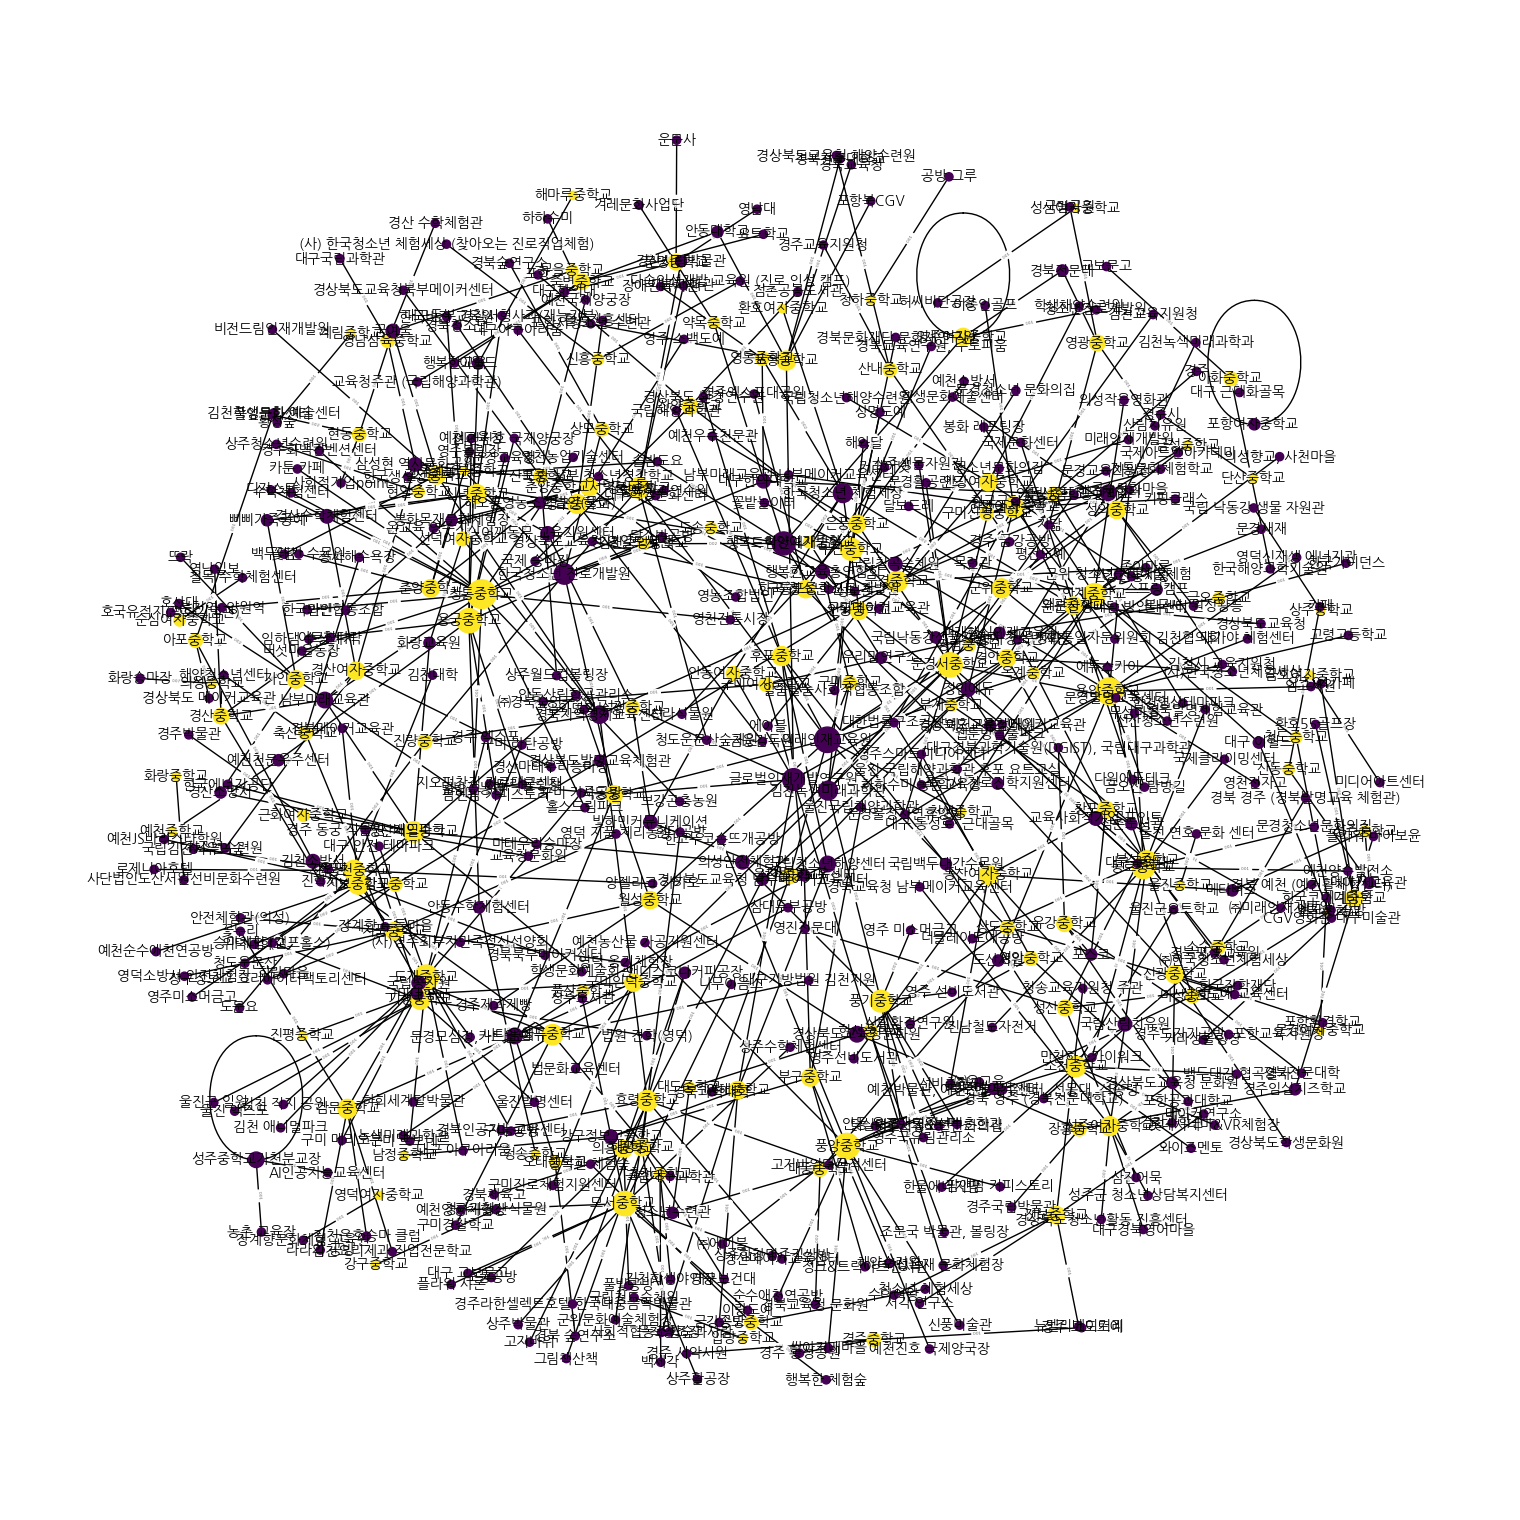

In [17]:
plt.figure(figsize=(15, 15))

degree = nx.degree(G_data)
pos=nx.spring_layout(G_data)
node_colors = [partition[node] for node in G_data.nodes()]
nx.draw(G_data, pos, with_labels=True, node_size=[5 + v[1]*30 for v in degree], font_family='NanumGothic',
        font_size=10, node_color=node_colors, cmap='viridis')

edge_weight = nx.get_edge_attributes(G_data, 'weight')
nx.draw_networkx_edge_labels(G_data, pos, edge_labels = edge_weight, alpha=0.6, font_size=3)
plt.show()

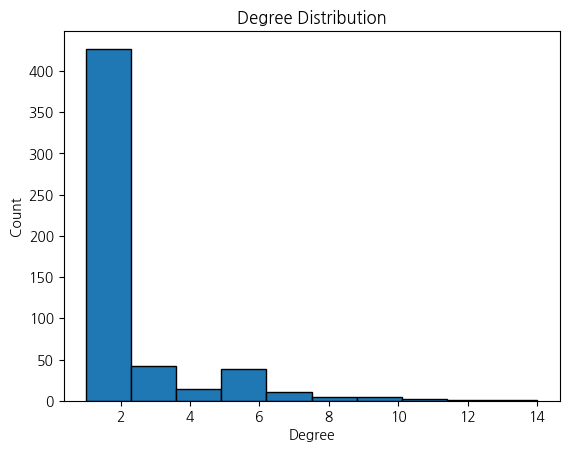

In [18]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values(), edgecolor = 'black')

plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')

# 그래프 출력
plt.show()

## Step 2. Attribute

### 1) Edge attribute (weight)

In [19]:
print(G_data.edges(data=True))

[('순심여자중학교', '칠곡 수학체험센터', {'weight': 0.01}), ('순심여자중학교', '호국유적지(평화기념관)', {'weight': 0.01}), ('영남삼육중학교', '경산 수학체험관', {'weight': 0.01}), ('영남삼육중학교', '대구국립과학관', {'weight': 0.01}), ('영남삼육중학교', '삼성현 역사문화공원', {'weight': 0.01}), ('김천중앙중학교', '한국청소년 진로개발원', {'weight': 0.04}), ('김천중앙중학교', '행복드림인재개발원', {'weight': 0.02}), ('청도중학교', 'CGV영화관 대구미술관', {'weight': 0.01}), ('청도중학교', '운문산생태탐 방안내센터', {'weight': 0.01}), ('기성중학교', '경주 동궁 식물원, 버드파크', {'weight': 0.01}), ('기성중학교', '법원 견학(영덕)', {'weight': 0.01}), ('기성중학교', '승마체험 (캠프홀스)', {'weight': 0.01}), ('기성중학교', '울진 엑스포', {'weight': 0.01}), ('기성중학교', '울진군 일원', {'weight': 0.01}), ('기성중학교', '울진발명센터', {'weight': 0.01}), ('소수중학교', '경북 경주 (경북발명교육 체험관)', {'weight': 0.01}), ('소수중학교', '경북 영주 (경북전문대학교)', {'weight': 0.01}), ('소수중학교', '경북 예천 (예천활체험센터)', {'weight': 0.01}), ('옥계동부중학교', '한국청소년 진로개발원', {'weight': 0.02}), ('영주여자중학교 ', '경북전문대', {'weight': 0.01}), ('영주여자중학교 ', '영주여자중학교 ', {'weight': 0.02}), ('영주여자중학교 ', '청소년진로개발원', {'weight': 0.01}), ('영주여자중학교 ', '행복드림인재개발원',

### 2) Node attribute

In [20]:
print(G_data.nodes(data=True))

[('순심여자중학교', {'group': 1}), ('영남삼육중학교', {'group': 1}), ('김천중앙중학교', {'group': 1}), ('청도중학교', {'group': 1}), ('기성중학교', {'group': 1}), ('소수중학교', {'group': 1}), ('옥계동부중학교', {'group': 1}), ('영주여자중학교 ', {'group': 1}), ('하양여자중학교', {'group': 1}), ('경주중학교', {'group': 1}), ('현동중학교', {'group': 1}), ('문경서중학교', {'group': 1}), ('창포중학교', {'group': 1}), ('성주여자중학교', {'group': 1}), ('한일여자중학교', {'group': 1}), ('현서중학교', {'group': 1}), ('지품천중학교', {'group': 1}), ('도송중학교', {'group': 1}), ('선덕여자중학교', {'group': 1}), ('석전중학교', {'group': 1}), ('영안중학교', {'group': 1}), ('영광중학교', {'group': 1}), ('신광중학교', {'group': 1}), ('구미신평중학교', {'group': 1}), ('유강중학교', {'group': 1}), ('근화여자중학교', {'group': 1}), ('옥계중학교', {'group': 1}), ('의성중학교', {'group': 1}), ('죽변중학교', {'group': 1}), ('진평중학교', {'group': 1}), ('무산중학교', {'group': 1}), ('경안중학교', {'group': 1}), ('포항여자중학교 ', {'group': 0}), ('아화중학교', {'group': 1}), ('안강여자중학교', {'group': 1}), ('동로중학교', {'group': 1}), ('율곡중학교', {'group': 1}), ('인동중학교', {'group': 1}), ('자인중학교', {'group':

## Step 3. Social Network Analysis

In [21]:
deg_cen = nx.degree_centrality(G_data)
bet_cen = nx.betweenness_centrality(G_data)
clo_cen = nx.closeness_centrality(G_data)
eig_cen = nx.eigenvector_centrality(G_data)

In [22]:
# 각 centrality별 가장 값이 높은 5개의 node 추출
print('degree centrality:')
deg_cen_sorted = [(node, centrality) for node, centrality in deg_cen.items() if G_data.nodes[node]['group'] == 0]
deg_cen_sorted = sorted(deg_cen_sorted, key=lambda x: x[1], reverse=True)[0:5]
for node, centrality in deg_cen_sorted:
    print(f'{node}: {centrality:.2f}', end = ' ')
print()
print('betweenness centrality:')
bet_cen_sorted = [(node, centrality) for node, centrality in bet_cen.items() if G_data.nodes[node]['group'] == 0]
bet_cen_sorted = sorted(bet_cen_sorted, key=lambda x: x[1], reverse=True)[0:5]
for node, centrality in bet_cen_sorted:
    print(f'{node}: {centrality:.2f}', end = ' ')
print()
print('closeness centrality:')
clo_cen_sorted = [(node, centrality) for node, centrality in clo_cen.items() if G_data.nodes[node]['group'] == 0]
clo_cen_sorted = sorted(clo_cen_sorted, key=lambda x: x[1], reverse=True)[0:5]
for node, centrality in clo_cen_sorted:
    print(f'{node}: {centrality:.2f}', end = ' ')
print()
print('eigenvector centrality:')
eig_cen_sorted = [(node, centrality) for node, centrality in eig_cen.items() if G_data.nodes[node]['group'] == 0]
eig_cen_sorted = sorted(eig_cen_sorted, key=lambda x: x[1], reverse=True)[0:5]
for node, centrality in eig_cen_sorted:
    print(f'{node}: {centrality:.2f}', end = ' ')

degree centrality:
미래인재교육원: 0.02 행복드림인재개발원: 0.02 글로벌인재개발연구원: 0.01 한국청소년 진로개발원: 0.01 한국청소년 체험세상: 0.01 
betweenness centrality:
미래인재교육원: 0.13 글로벌인재개발연구원: 0.09 행복드림인재개발원: 0.09 한국청소년 진로개발원: 0.06 경북지역경제교육센터: 0.06 
closeness centrality:
미래인재교육원: 0.13 글로벌인재개발연구원: 0.13 한국청소년 진로개발원: 0.13 김천녹색미래과학관: 0.12 행복드림인재개발원: 0.12 
eigenvector centrality:
미래인재교육원: 0.43 김천녹색미래과학관: 0.23 행복드림인재개발원: 0.20 한국청소년 진로개발원: 0.18 글로벌인재개발연구원: 0.16 

In [23]:
import pandas as pd

def calc_centralities(graph):
    
    dgc = nx.degree_centrality(graph)
    dgc = pd.DataFrame.from_dict(dgc, orient='index', columns=["DGC"])
    btc = nx.betweenness_centrality(graph)
    btc = pd.DataFrame.from_dict(btc, orient='index', columns=["BTC"])
    clc = nx.closeness_centrality(graph)
    clc = pd.DataFrame.from_dict(clc, orient='index', columns=["CLC"])
    #evc = nx.eigenvector_centrality(graph, weight='weight')
    #evc = pd.DataFrame.from_dict(evc, orient='index', columns=["EVC"])

    df = pd.concat([dgc, btc, clc ], axis=1) #evc
    
    return df

df = calc_centralities(G_data)

In [24]:
region = []
for i in df.index:
  region.append(is_school[i])

In [25]:
df['region']=region

In [26]:
df

,DGC,BTC,CLC,region
순심여자중학교,0.003676,0.000007,0.003676,1
영남삼육중학교,0.005515,0.004611,0.093117,1
김천중앙중학교,0.003676,0.009663,0.116915,1
청도중학교,0.003676,0.000007,0.003676,1
기성중학교,0.011029,0.000102,0.011029,1
...,...,...,...,...
국립공원,0.001838,0.000000,0.069808,0
경북인공지능교육센터,0.001838,0.000000,0.077452,0
울진 엑스포,0.001838,0.000000,0.006016,0
대구공업대,0.001838,0.000000,0.004202,0


In [27]:
result = df.groupby('region').sum()

# 결과 출력
print(result)

             DGC       BTC        CLC
region                               
0       0.990809  1.188015  22.551174
1       0.979779  1.388656   8.530252


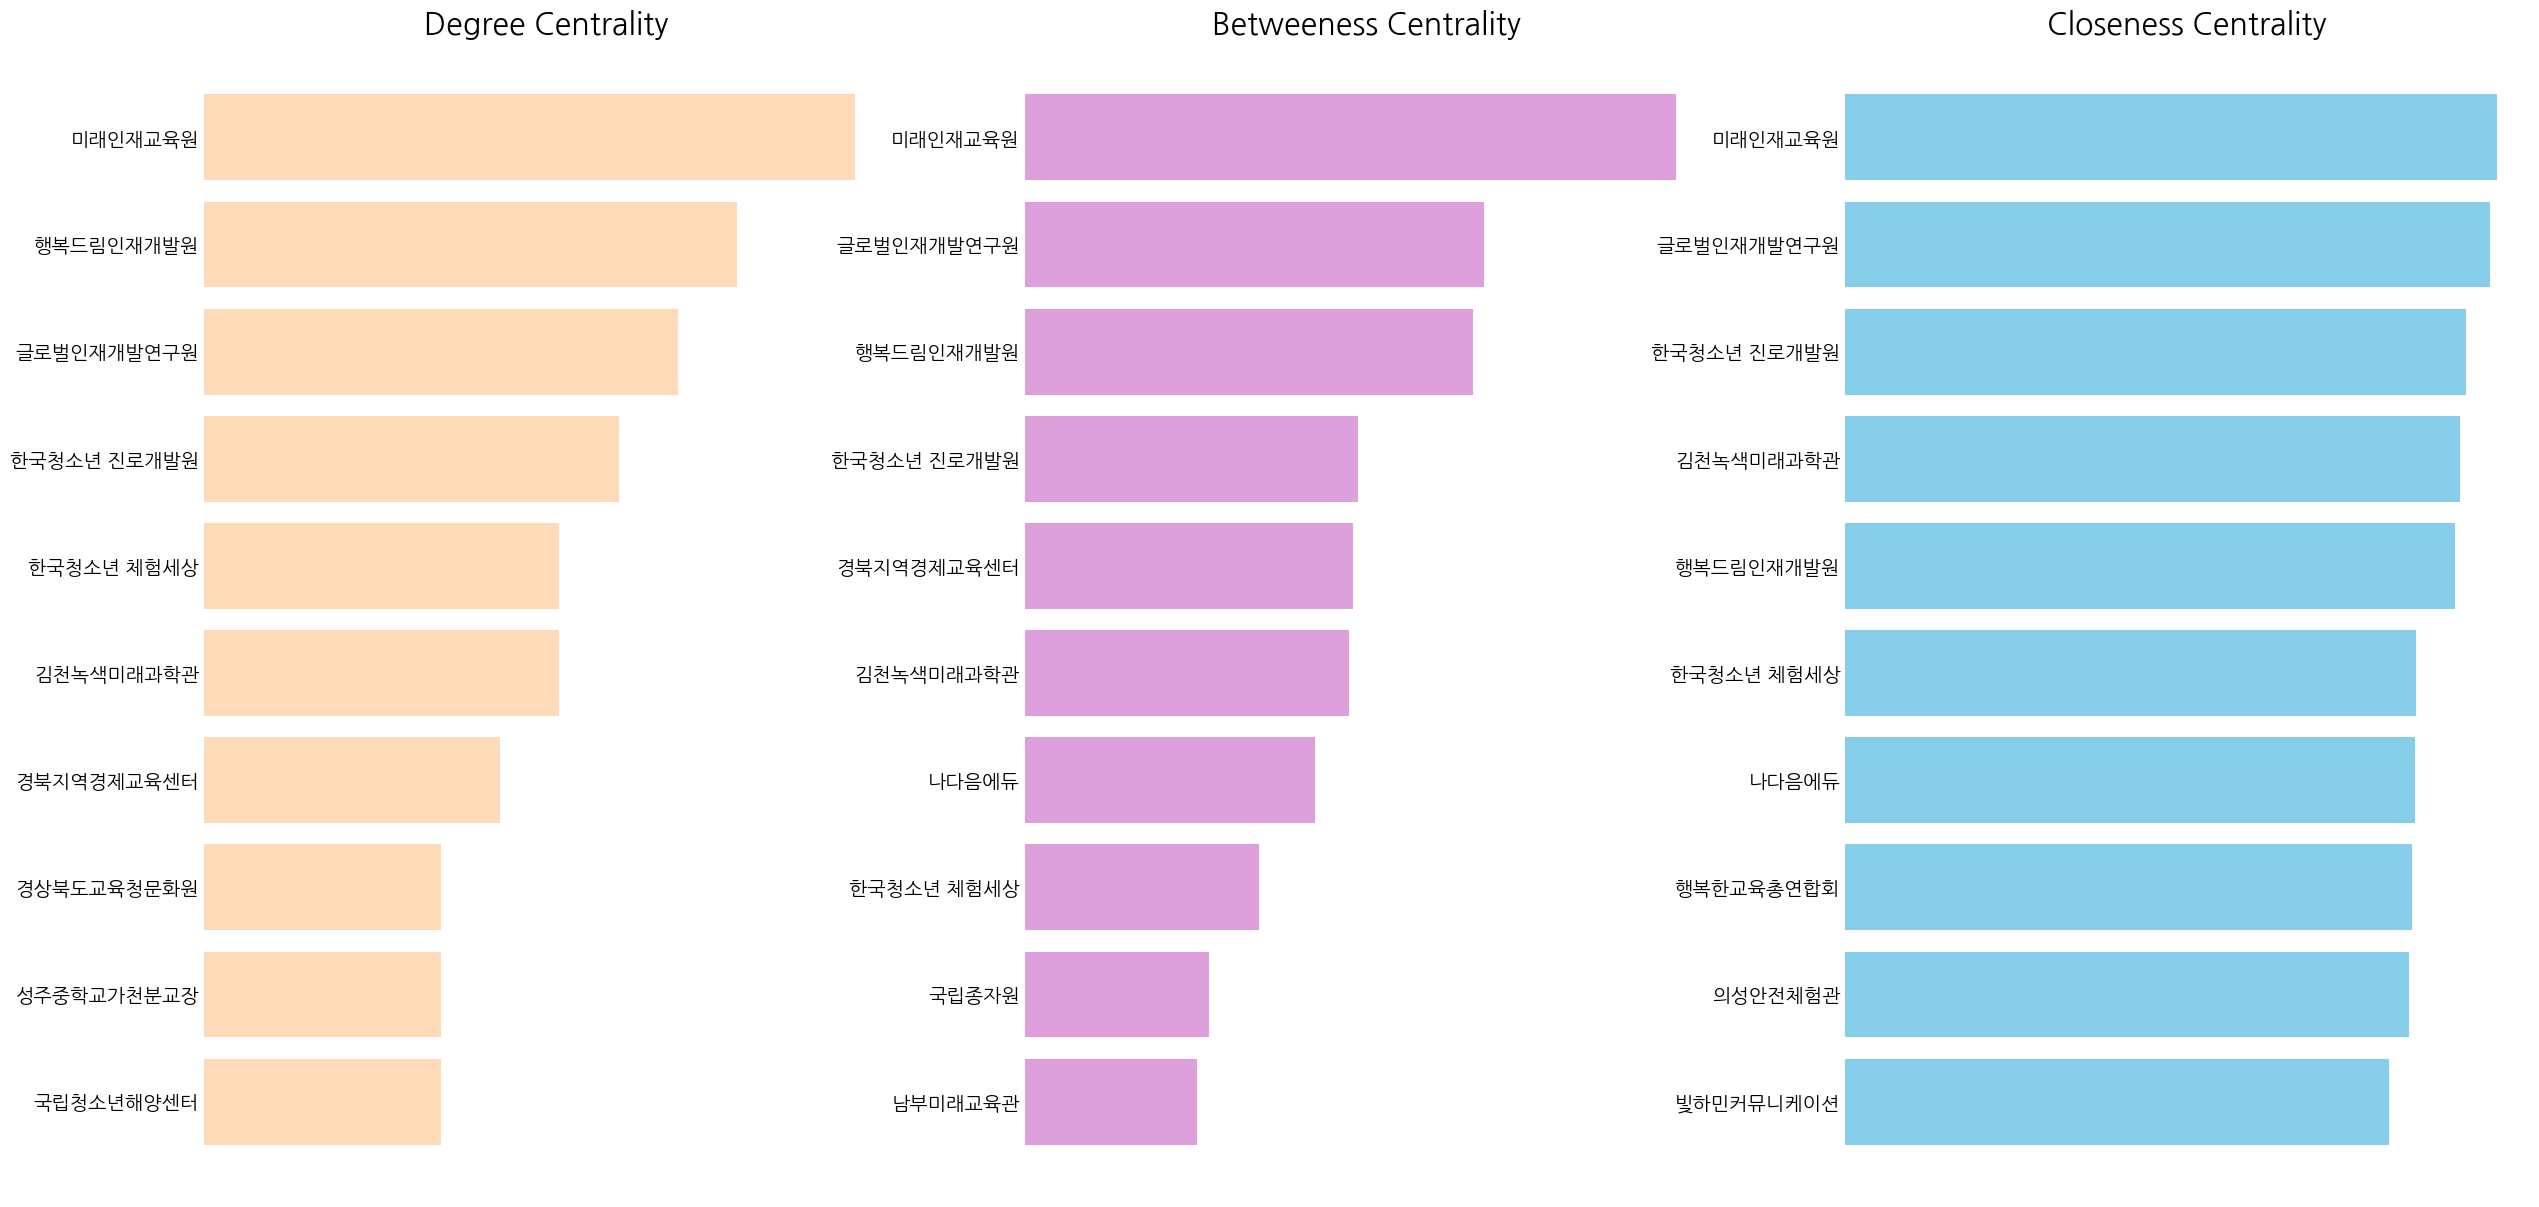

In [28]:
import matplotlib.pyplot as plt

def plot_centrality(centr, df, title, n, col_list):
    
    ax = plt.subplot(1, 3, n)
    s = df[df.index.isin([node for node in df.index if G_data.nodes[node]['group'] == 0])]
    s = s.sort_values(centr, ascending=False)[:10]
    x = list(s[centr].index)[::-1]
    y = list(s[centr])[::-1]
    
    for i, v in enumerate(y):
        bars = plt.barh(x[i], v, color=col_list[n-1])
    
    plt.title(title, size=22)
    ax.get_xaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y', length = 0, labelsize=14)


col_list = ["peachpuff", "plum", 'skyblue', "orange"]
fig, ax = plt.subplots(1,3, figsize=(30, 15))
plot_centrality("DGC", df, 'Degree Centrality', 1, col_list)
plot_centrality("BTC", df, 'Betweeness Centrality', 2, col_list)
plot_centrality("CLC", df, 'Closeness Centrality', 3, col_list)
#plot_centrality("EVC", df, 'Eigenvector Centrality', 4, col_list)

# 제안하는 방식 기반

In [61]:
result_df = pd.read_csv(f"{ROOT}/data/AHP_result2.csv")
result_df

,학교명,체험처,점수,학교_위도,학교_경도,체험처_위도,체험처_경도
0,경북체육중학교,경산시청소년문화의집,(0.9026779382294743+0j),35.812226,128.738053,35.816350,128.735410
1,경북체육중학교,도닥도닥 사회적 협동조합,(0.9195830170948804+0j),35.812226,128.738053,35.825122,128.741329
2,경북체육중학교,도닥도닥 사회적 협동조합,(0.8964524253000519+0j),35.812226,128.738053,35.825122,128.741329
3,경산여자중학교,도닥도닥 사회적 협동조합,(0.9660160760641396+0j),35.817764,128.729945,35.825122,128.741329
4,경산여자중학교,고령군선거관리위원회,(0.8910734598353565+0j),35.817764,128.729945,35.729146,128.272840
...,...,...,...,...,...,...,...
1361,흥해중학교,카빙앤조이,(0.909146530149552+0j),36.109218,129.341171,36.039332,129.367717
1362,흥해중학교,카빙앤조이,(0.9288128786933663+0j),36.109218,129.341171,36.039332,129.367717
1363,흥해중학교,카빙앤조이,(0.8965412860577144+0j),36.109218,129.341171,36.039332,129.367717
1364,흥해중학교,카빙앤조이,(0.9143075410529813+0j),36.109218,129.341171,36.039332,129.367717


## Step1. Graph

In [62]:
result_list = []
grouped_df = result_df.groupby(['학교명', '체험처']).size().reset_index(name='행 개수')

for index, row in grouped_df.iterrows():
    school = row['학교명']
    experience = row['체험처']
    row_count = row['행 개수'] / 100
    result_list.append((school, experience, row_count))

print(result_list)

[('가은중학교', '경상북도 문경소방서', 0.01), ('가은중학교', '문경시청소년문화의집', 0.03), ('감천중학교', '문경시청소년문화의집', 0.04), ('감천중학교', '한국미래코칭교육연구소', 0.01), ('감포중학교', '교과서여행', 0.01), ('감포중학교', '동리목월문학관', 0.02), ('감포중학교', '법무부 청소년 범죄예방위원 경주지역 협의회', 0.01), ('감포중학교', '카빙앤조이', 0.01), ('감포중학교', '한수원(주)본사', 0.01), ('경구중학교', '명인정보고등학교', 0.01), ('경구중학교', '미래핵심인재교육원', 0.03), ('경구중학교', '박정희대통령 생가', 0.01), ('경덕중학교', '경북하이텍고등학교(도시환경디자인)', 0.01), ('경덕중학교', '경상북도 문경소방서', 0.01), ('경덕중학교', '안동산림항공관리소', 0.03), ('경덕중학교', '안동청소년문화센터', 0.01), ('경덕중학교', '한국부동산원 안동지사', 0.02), ('경북중부중학교', '경상북도청소년수련원', 0.01), ('경북중부중학교', '박정희대통령 생가', 0.01), ('경북중부중학교', '칠곡군청소년문화의집', 0.02), ('경북체육중학교', '경산시청소년문화의집', 0.01), ('경북체육중학교', '도닥도닥 사회적 협동조합', 0.02), ('경산여자중학교', '경산시청소년문화의집', 0.02), ('경산여자중학교', '고령군선거관리위원회', 0.01), ('경산여자중학교', '글로벌인재개발연구원', 0.02), ('경산여자중학교', '도닥도닥 사회적 협동조합', 0.01), ('경산중학교', '경산시청소년문화의집', 0.02), ('경산중학교', '글로벌인재개발연구원', 0.02), ('경산중학교', '핸즈체험터', 0.01), ('경안여자중학교', '경북하이텍고등학교(도시환경디자인)', 0.01), ('경안여자중학교', '문경시청소년문화의집', 0.01), ('경안여자

In [63]:
edges_tuples = result_list

In [64]:
node_chars = []
for i in set(result_df['학교명'].values):
  node_chars.append(i)
for i in set(result_df['체험처'].values):
  node_chars.append(i)
node_chars

['순심여자중학교',
 '양학중학교',
 '용암중학교',
 '소수중학교',
 '기성중학교',
 '청도중학교',
 '포항여자중학교',
 '울릉중학교',
 '신상중학교',
 '옥계동부중학교',
 '하양여자중학교',
 '경안여자중학교',
 '경주중학교',
 '청량중학교',
 '온정중학교',
 '고경중학교',
 '대송중학교',
 '포항동해중학교',
 '삼성현중학교',
 '자인여자중학교',
 '동명중학교',
 '청송여자중학교',
 '문경서중학교',
 '창포중학교',
 '송라중학교',
 '성주여자중학교',
 '한일여자중학교',
 '양남중학교',
 '현서중학교',
 '안덕중학교',
 '구미인덕중학교',
 '복주여자중학교',
 '상주여자중학교',
 '지품천중학교',
 '북삼중학교',
 '대창중학교',
 '도송중학교',
 '선덕여자중학교',
 '영천중학교',
 '영안중학교',
 '석전중학교',
 '영광중학교',
 '감천중학교',
 '용문중학교',
 '대흥중학교',
 '길주중학교',
 '구미신평중학교',
 '성남여자중학교',
 '병곡중학교',
 '영양중학교',
 '용성중학교',
 '내서중학교',
 '근화여자중학교',
 '불국중학교',
 '옥계중학교',
 '유강중학교',
 '의성중학교',
 '진성중학교',
 '예천여자중학교',
 '죽변중학교',
 '용운중학교',
 '수비중학교',
 '무산중학교',
 '경안중학교',
 '순심중학교',
 '영일중학교',
 '아화중학교',
 '청리중학교',
 '율곡중학교',
 '평해중학교',
 '인동중학교',
 '자인중학교',
 '남산중학교',
 '풍천중학교',
 '영천여자중학교',
 '화북중학교',
 '상도중학교',
 '용궁중학교',
 '화랑중학교',
 '영양여자중학교',
 '상지여자중학교',
 '외동중학교',
 '기계중학교',
 '산내중학교',
 '가은중학교',
 '문화중학교',
 '영광여자중학교',
 '부구중학교',
 '산양중학교',
 '석보중학교',
 '석포중학교',
 '상주중학교',
 '고령중학교개진분교장',
 '현일중학교',
 '지보중학교'

In [65]:
G_data = nx.Graph()

G_data.add_nodes_from(node_chars)

G_data.add_weighted_edges_from(edges_tuples)

In [66]:
is_school = {}

for index, row in result_df.iterrows():
    school = row['학교명']
    experience = row['체험처']
    is_school[school] = 1
    is_school[experience] = 0

print(is_school)

{'경북체육중학교': 1, '경산시청소년문화의집': 0, '도닥도닥 사회적 협동조합': 0, '경산여자중학교': 1, '고령군선거관리위원회': 0, '글로벌인재개발연구원': 0, '자인여자중학교': 1, '라온스포츠복지사회적협동조합': 0, '경산시계림청소년수련원': 0, '영천시청소년수련관': 0, '스타온뮤지컬댄스학원': 0, '경산중학교': 1, '핸즈체험터': 0, '대구가톨릭대학교사범대학부속무학중학교': 1, '문명중학교': 1, '사동중학교': 1, '삼성현중학교': 1, '신상중학교': 1, '경상북도보건환경연구원': 0, '압량중학교': 1, '한국교육전문가협회': 0, '용성중학교': 1, '자인중학교': 1, '법무부 청소년 범죄예방위원 경주지역 협의회': 0, '장산중학교': 1, '진량중학교': 1, '하양여자중학교': 1, '감포중학교': 1, '동리목월문학관': 0, '한수원(주)본사': 0, '카빙앤조이': 0, '교과서여행': 0, '경주여자중학교': 1, '경주시청소년수련관': 0, '경주중학교': 1, '계림중학교': 1, '근화여자중학교': 1, '예보담': 0, '무산중학교': 1, '경주국립공원사무소': 0, '문화중학교': 1, '불국중학교': 1, '자호교육체험농원': 0, '산내중학교': 1, '농업회사법인(주)한국와인': 0, '늘푸른체험학교': 0, '서라벌여자중학교': 1, '선덕여자중학교': 1, '스토리움': 0, '신라중학교': 1, '아화중학교': 1, '양남중학교': 1, '양북중학교': 1, '외동중학교': 1, '월성중학교': 1, '화랑중학교': 1, '참사랑어머니회': 0, '고령중학교개진분교장': 1, '박정희대통령 생가': 0, '고령중학교': 1, '칠곡군청소년문화의집': 0, '봉이땅엔': 0, '대구은행 고령지점': 0, '다산중학교': 1, '명인정보고등학교': 0, '성산중학교': 1, '쌍림중학교': 1, '대창양로원': 0, '고령군청소년문화의집': 0, '안다미로 귀때 박물관':

In [67]:
is_school['사동중학교']

1

In [68]:
import community

partition = is_school

nx.set_node_attributes(G_data, partition, 'group')

In [69]:
print('Number of nodes:', nx.number_of_nodes(G_data))
print('Number of nodes:', nx.number_of_edges(G_data))

Number of nodes: 321
Number of nodes: 850


In [70]:
#G_data.nodes

In [71]:
#G_data.edges

In [72]:
import matplotlib
matplotlib.matplotlib_fname()

'/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc'

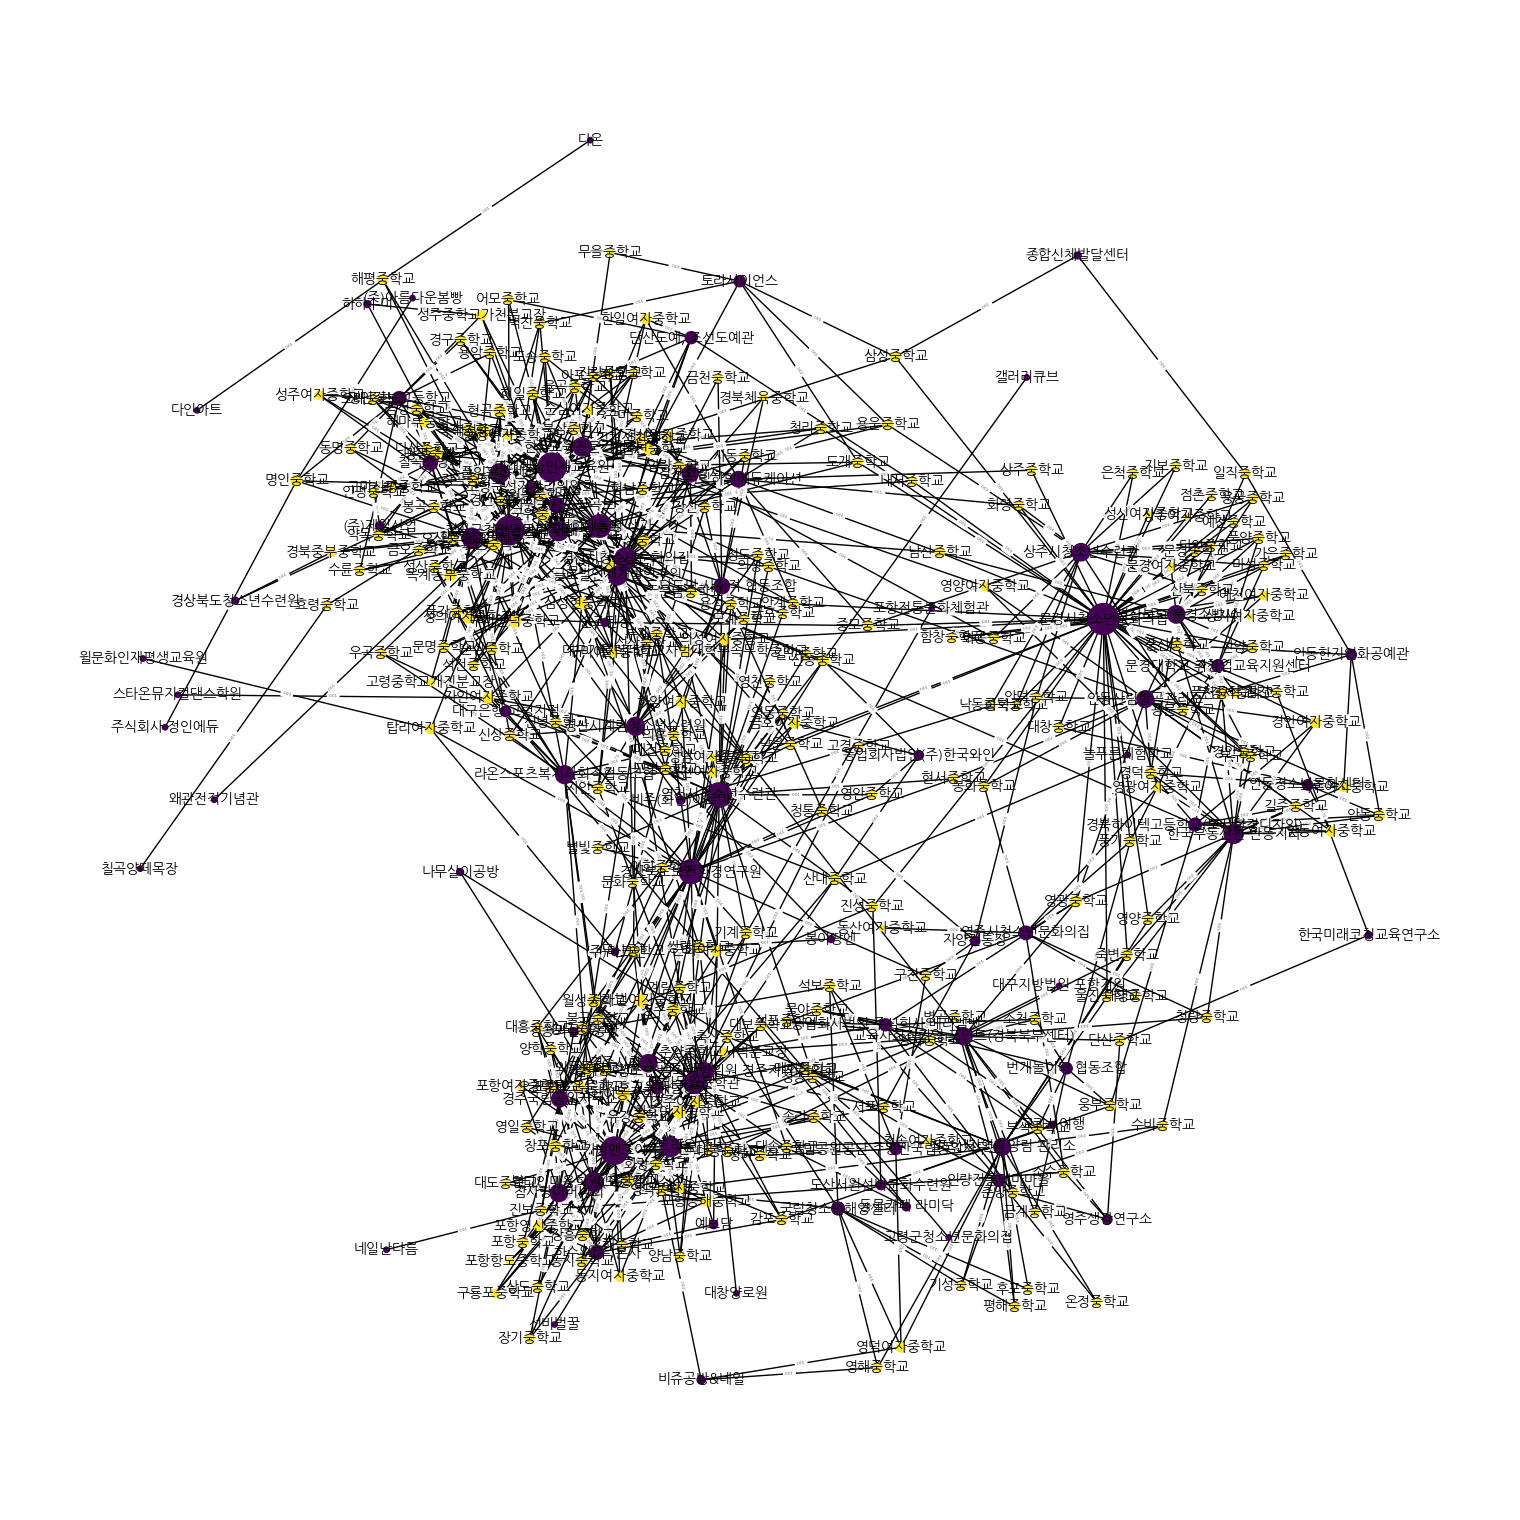

In [73]:
plt.figure(figsize=(15, 15))

degree = nx.degree(G_data)
pos=nx.spring_layout(G_data)
node_colors = [partition[node] for node in G_data.nodes()]
nx.draw(G_data, pos, with_labels=True, node_size=[5 + v[1]*10 for v in degree], font_family='NanumGothic',
        font_size=10, node_color=node_colors, cmap='viridis')

edge_weight = nx.get_edge_attributes(G_data, 'weight')
nx.draw_networkx_edge_labels(G_data, pos, edge_labels = edge_weight, alpha=0.6, font_size=3)
plt.show()

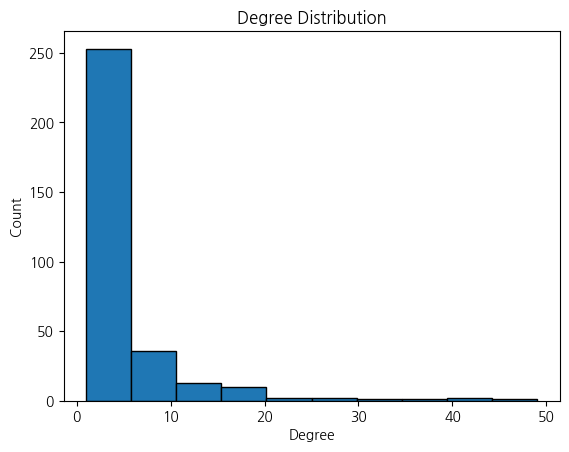

In [74]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values(), edgecolor = 'black')

plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')

# 그래프 출력
plt.show()

## Step 2. Attribute

### 1) Edge attribute (weight)

In [75]:
print(G_data.edges(data=True))

[('순심여자중학교', '박정희대통령 생가', {'weight': 0.01}), ('순심여자중학교', '안다미로 귀때 박물관', {'weight': 0.02}), ('순심여자중학교', '칠곡소방서', {'weight': 0.01}), ('양학중학교', '경주국립공원사무소', {'weight': 0.01}), ('양학중학교', '뷰티인미용학원(포항캠퍼스)', {'weight': 0.03}), ('양학중학교', '카빙앤조이', {'weight': 0.02}), ('용암중학교', '명인정보고등학교', {'weight': 0.02}), ('용암중학교', '안다미로 귀때 박물관', {'weight': 0.01}), ('용암중학교', '핸즈체험터', {'weight': 0.01}), ('소수중학교', '교육사회적기업 포인트(경북북부센터)', {'weight': 0.01}), ('소수중학교', '도산서원선비문화수련원', {'weight': 0.01}), ('소수중학교', '영주생강연구소', {'weight': 0.01}), ('소수중학교', '영주시청소년문화의집', {'weight': 0.01}), ('기성중학교', '국립청소년해양센터', {'weight': 0.01}), ('기성중학교', '인량전통테마마을', {'weight': 0.01}), ('기성중학교', '칠보산자연휴양림 관리소', {'weight': 0.03}), ('청도중학교', '경산시계림청소년수련원', {'weight': 0.01}), ('청도중학교', '경산시청소년문화의집', {'weight': 0.01}), ('청도중학교', '영천시청소년수련관', {'weight': 0.01}), ('포항여자중학교', '참사랑어머니회', {'weight': 0.02}), ('포항여자중학교', '카빙앤조이', {'weight': 0.06}), ('울릉중학교', '경산시청소년문화의집', {'weight': 0.01}), ('울릉중학교', '고령군선거관리위원회', {'weight': 0.01}), ('울릉중학교', '교육사회

### 2) Node attribute

In [76]:
print(G_data.nodes(data=True))

[('순심여자중학교', {'group': 1}), ('양학중학교', {'group': 1}), ('용암중학교', {'group': 1}), ('소수중학교', {'group': 1}), ('기성중학교', {'group': 1}), ('청도중학교', {'group': 1}), ('포항여자중학교', {'group': 1}), ('울릉중학교', {'group': 1}), ('신상중학교', {'group': 1}), ('옥계동부중학교', {'group': 1}), ('하양여자중학교', {'group': 1}), ('경안여자중학교', {'group': 1}), ('경주중학교', {'group': 1}), ('청량중학교', {'group': 1}), ('온정중학교', {'group': 1}), ('고경중학교', {'group': 1}), ('대송중학교', {'group': 1}), ('포항동해중학교', {'group': 1}), ('삼성현중학교', {'group': 1}), ('자인여자중학교', {'group': 1}), ('동명중학교', {'group': 1}), ('청송여자중학교', {'group': 1}), ('문경서중학교', {'group': 1}), ('창포중학교', {'group': 1}), ('송라중학교', {'group': 1}), ('성주여자중학교', {'group': 1}), ('한일여자중학교', {'group': 1}), ('양남중학교', {'group': 1}), ('현서중학교', {'group': 1}), ('안덕중학교', {'group': 1}), ('구미인덕중학교', {'group': 1}), ('복주여자중학교', {'group': 1}), ('상주여자중학교', {'group': 1}), ('지품천중학교', {'group': 1}), ('북삼중학교', {'group': 1}), ('대창중학교', {'group': 1}), ('도송중학교', {'group': 1}), ('선덕여자중학교', {'group': 1}), ('영천중학교', {'group'

## Step 3. Social Network Analysis

In [77]:
deg_cen = nx.degree_centrality(G_data)
bet_cen = nx.betweenness_centrality(G_data)
clo_cen = nx.closeness_centrality(G_data)

In [78]:
# 각 centrality별 가장 값이 높은 5개의 node 추출
print('degree centrality:')
deg_cen_sorted = [(node, centrality) for node, centrality in deg_cen.items() if G_data.nodes[node]['group'] == 0]
deg_cen_sorted = sorted(deg_cen_sorted, key=lambda x: x[1], reverse=True)[0:5]
for node, centrality in deg_cen_sorted:
    print(f'{node}: {centrality:.2f}', end = ' ')
print()
print('betweenness centrality:')
bet_cen_sorted = [(node, centrality) for node, centrality in bet_cen.items() if G_data.nodes[node]['group'] == 0]
bet_cen_sorted = sorted(bet_cen_sorted, key=lambda x: x[1], reverse=True)[0:5]
for node, centrality in bet_cen_sorted:
    print(f'{node}: {centrality:.2f}', end = ' ')
print()
print('closeness centrality:')
clo_cen_sorted = [(node, centrality) for node, centrality in clo_cen.items() if G_data.nodes[node]['group'] == 0]
clo_cen_sorted = sorted(clo_cen_sorted, key=lambda x: x[1], reverse=True)[0:5]
for node, centrality in clo_cen_sorted:
    print(f'{node}: {centrality:.2f}', end = ' ')

degree centrality:
문경시청소년문화의집: 0.15 칠곡군청소년문화의집: 0.13 미래핵심인재교육원: 0.13 카빙앤조이: 0.12 영천시청소년수련관: 0.09 
betweenness centrality:
문경시청소년문화의집: 0.30 카빙앤조이: 0.19 칠곡군청소년문화의집: 0.18 영천시청소년수련관: 0.13 경상북도보건환경연구원: 0.11 
closeness centrality:
문경시청소년문화의집: 0.35 칠곡군청소년문화의집: 0.34 영천시청소년수련관: 0.33 경상북도보건환경연구원: 0.32 카빙앤조이: 0.32 

In [79]:
import pandas as pd

def calc_centralities(graph):
    
    dgc = nx.degree_centrality(graph)
    dgc = pd.DataFrame.from_dict(dgc, orient='index', columns=["DGC"])
    btc = nx.betweenness_centrality(graph)
    btc = pd.DataFrame.from_dict(btc, orient='index', columns=["BTC"])
    clc = nx.closeness_centrality(graph)
    clc = pd.DataFrame.from_dict(clc, orient='index', columns=["CLC"])

    df = pd.concat([dgc, btc, clc ], axis=1) #evc
    
    return df

df = calc_centralities(G_data)

In [80]:
region = []
for i in df.index:
  region.append(is_school[i])

In [81]:
df['region']=region

In [82]:
df

,DGC,BTC,CLC,region
순심여자중학교,0.009375,0.000498,0.232389,1
양학중학교,0.009375,0.000398,0.246723,1
용암중학교,0.009375,0.001386,0.237565,1
소수중학교,0.012500,0.004608,0.234776,1
기성중학교,0.009375,0.000815,0.199875,1
...,...,...,...,...
경상북도청소년수련원,0.006250,0.000025,0.212766,0
상주시청소년수련관,0.046875,0.012663,0.240240,0
선비벌꿀,0.003125,0.000000,0.184544,0
도산서원선비문화수련원,0.012500,0.009378,0.238095,0


In [83]:
result = df.groupby('region').sum()

# 결과 출력
print(result)

            DGC       BTC        CLC
region                              
0       2.65625  1.788382  20.014811
1       2.65625  1.315027  59.799929


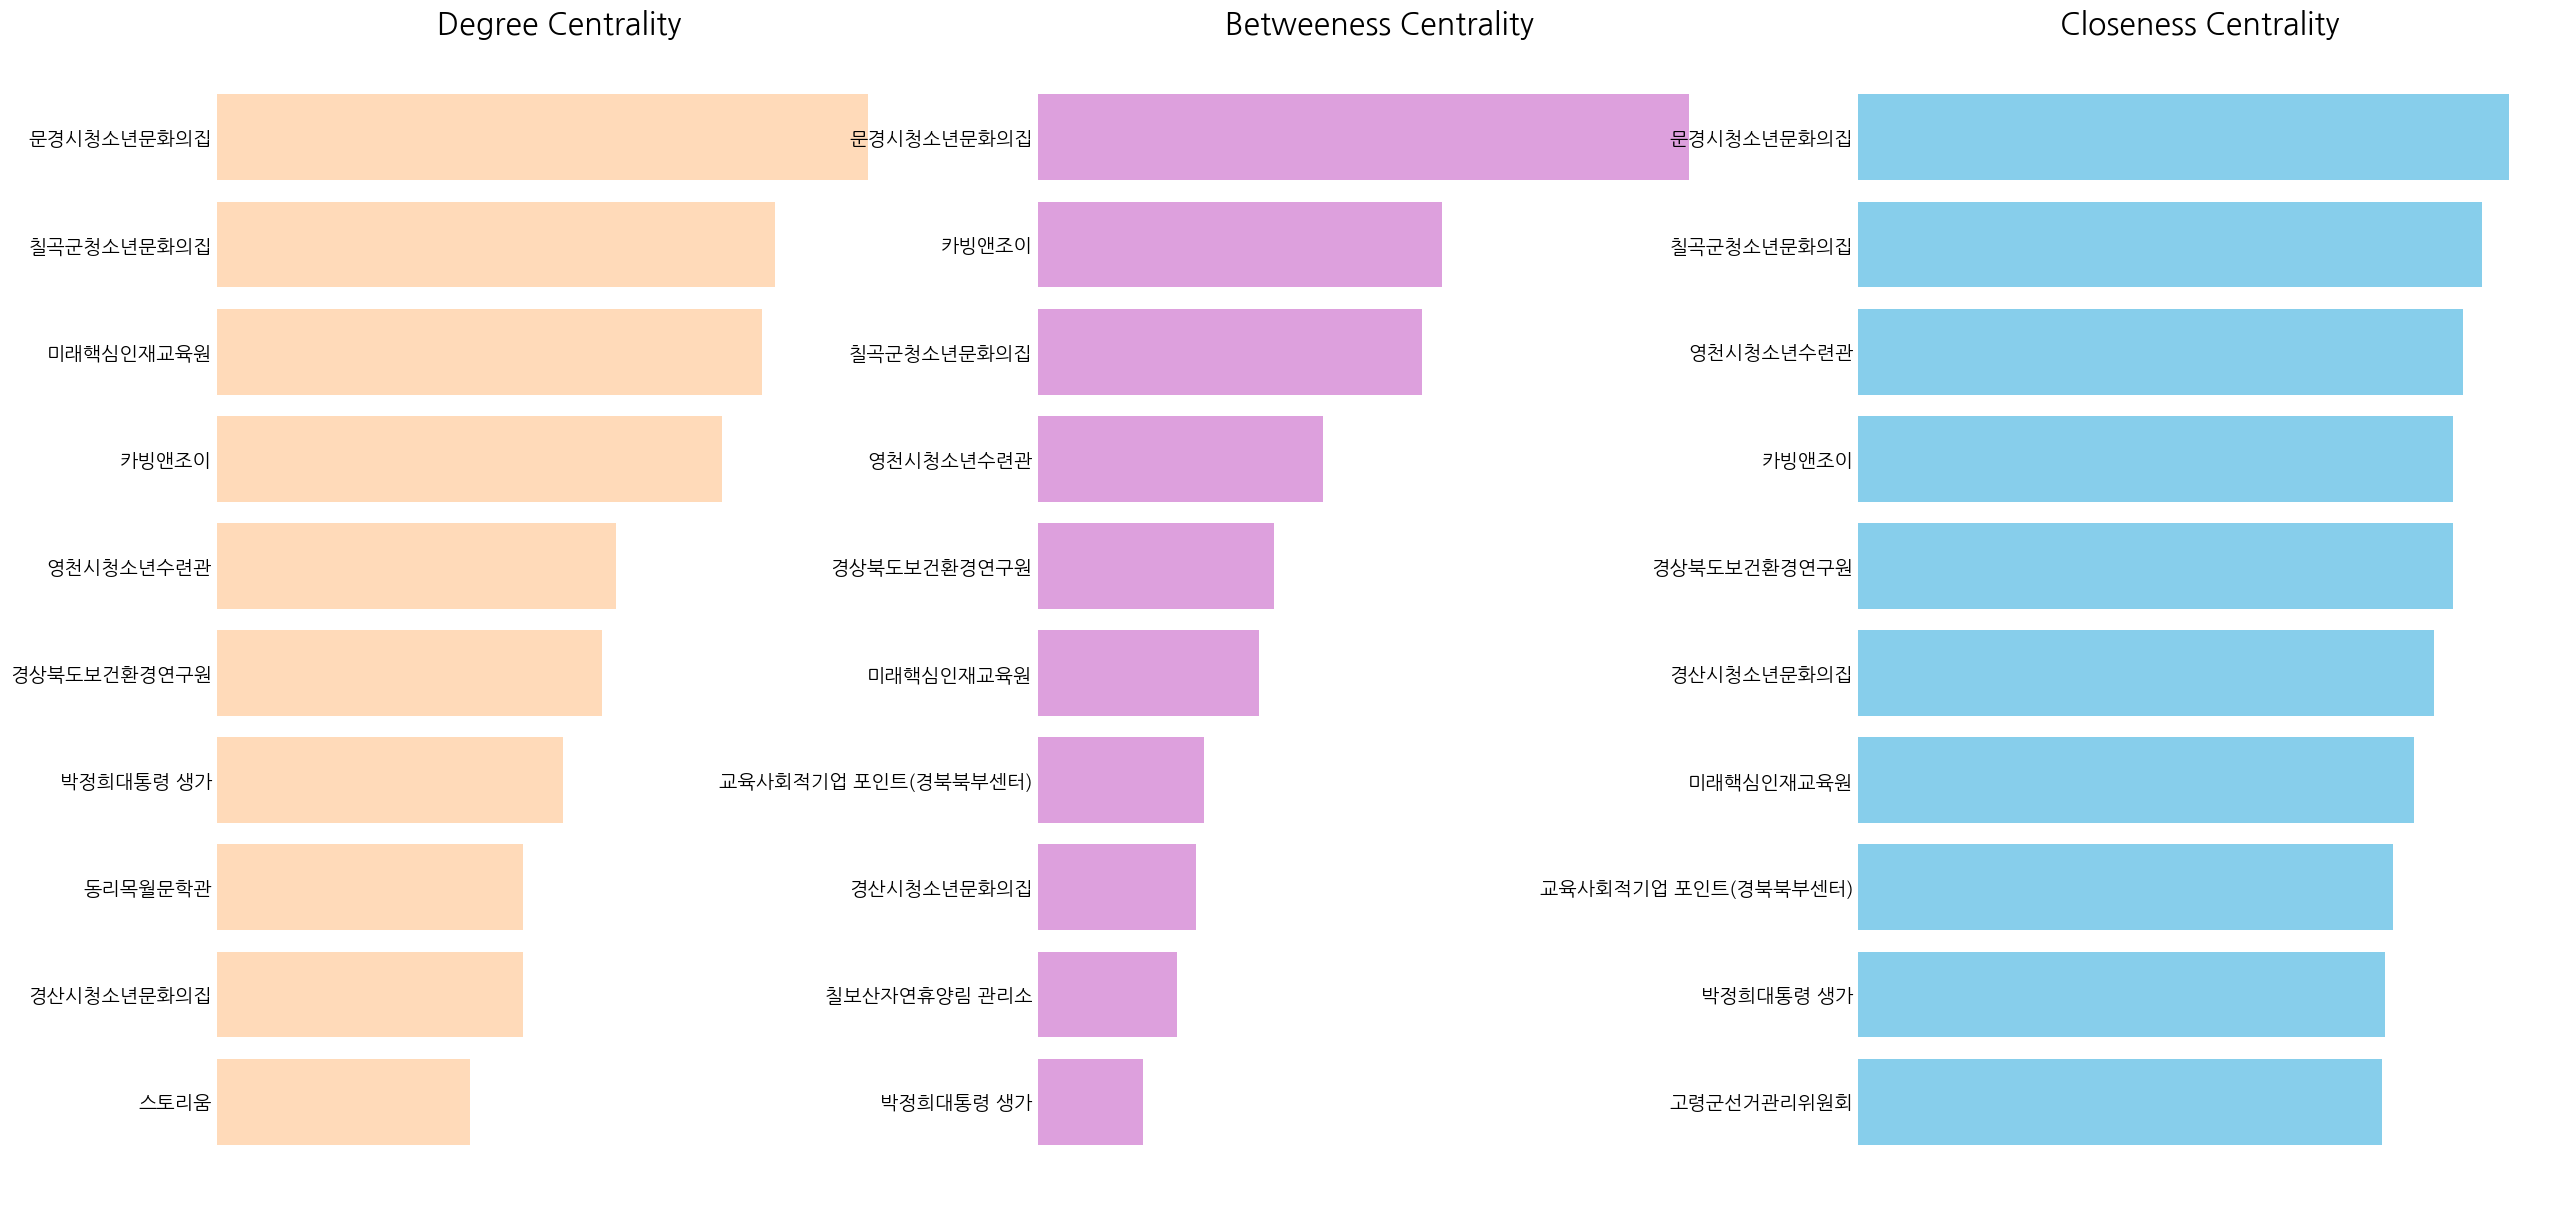

In [84]:
import matplotlib.pyplot as plt

def plot_centrality(centr, df, title, n, col_list):
    
    ax = plt.subplot(1, 3, n)
    s = df[df.index.isin([node for node in df.index if G_data.nodes[node]['group'] == 0])]
    s = s.sort_values(centr, ascending=False)[:10]
    x = list(s[centr].index)[::-1]
    y = list(s[centr])[::-1]
    
    for i, v in enumerate(y):
        bars = plt.barh(x[i], v, color=col_list[n-1])
    
    plt.title(title, size=22)
    ax.get_xaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y', length = 0, labelsize=14)


col_list = ["peachpuff", "plum", 'skyblue', "orange"]
fig, ax = plt.subplots(1,3, figsize=(30, 15))
plot_centrality("DGC", df, 'Degree Centrality', 1, col_list)
plot_centrality("BTC", df, 'Betweeness Centrality', 2, col_list)
plot_centrality("CLC", df, 'Closeness Centrality', 3, col_list)